In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [68]:
data = pd.read_csv('updated.csv')

In [69]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [70]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [71]:
data=data.drop(['day','month','year'],axis=1)

In [72]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [73]:
data['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [74]:
data['Classes']=np.where(data['Classes'].str.contains('not fire'),0,1)

In [75]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [76]:
data['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [77]:
X = data.drop(['FWI'],axis=1)
Y = data['FWI']

In [78]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [79]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
115,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0,0
207,33,37,16,0.0,92.2,61.3,167.2,13.1,64.0,1,1
158,38,43,13,0.5,85.0,13.0,35.4,4.1,13.7,1,1
132,31,42,21,0.0,90.6,18.2,30.5,13.4,18.0,1,1
84,34,64,14,0.0,88.9,40.5,171.3,9.0,50.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0,0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,1,1


### Feature Engineering

In [80]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


In [81]:
def corr(data,threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                value = corr_matrix.columns[i]
                col_corr.add(value)
    return col_corr

In [82]:
corr_features=corr(x_train,0.85)
corr_features

{'BUI', 'DC'}

In [83]:
x_train=x_train.drop(corr_features,axis=1)
x_test=x_test.drop(corr_features,axis=1)
x_train.shape, x_test.shape

((194, 9), (49, 9))

### Normalization

In [84]:
scaler = StandardScaler()

In [85]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Box plot to understand the normalizaiton

Text(0.5, 1.0, 'After Standardization')

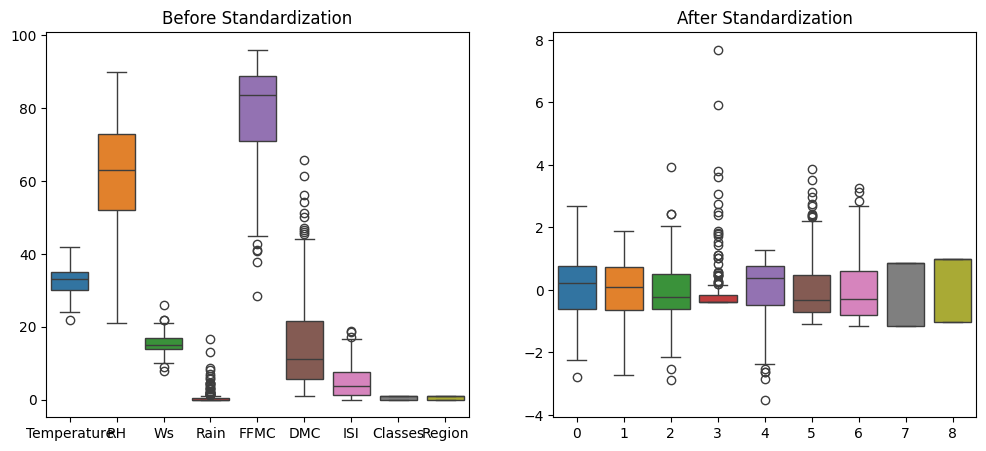

In [86]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.title('Before Standardization')
plt.subplot(1,2,2)
sns.boxplot(x_train_scaled)
plt.title('After Standardization')

### Linear Regression

MAE: 0.5049978694165681
R2 Score: 0.9805895859259882


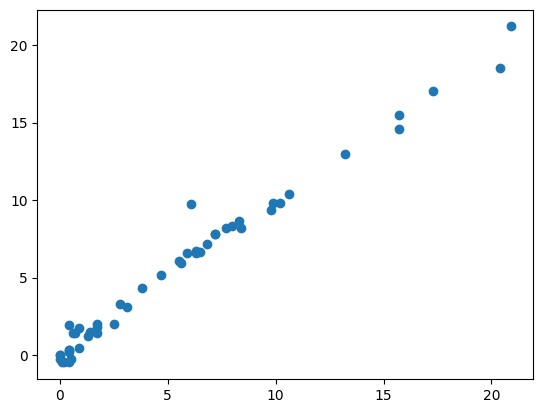

In [87]:
model1 = LinearRegression()
model1.fit(x_train_scaled,y_train)
y_pred=model1.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2score= r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2 Score:',r2score)
plt.scatter(y_test,y_pred)

### Lasso Regrssion

MAE: 1.0093958923873403
R2 Score: 0.9430507350726564


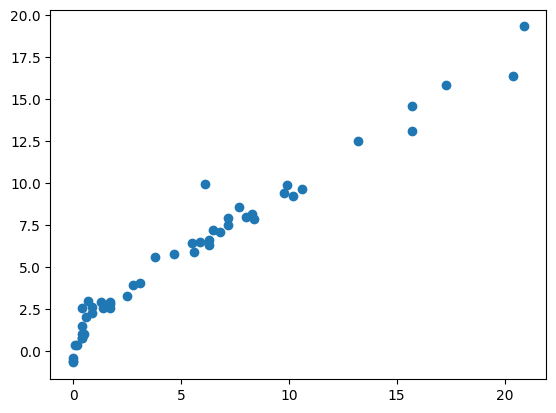

In [88]:
model1 = Lasso()
model1.fit(x_train_scaled,y_train)
y_pred=model1.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2score= r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2 Score:',r2score)
plt.scatter(y_test,y_pred)

In [89]:
model3 = LassoCV(cv=5)
model3.fit(x_train_scaled,y_train)

LassoCV(cv=5)

MAE: 0.555671503161787
R2 Score: 0.978328234520343


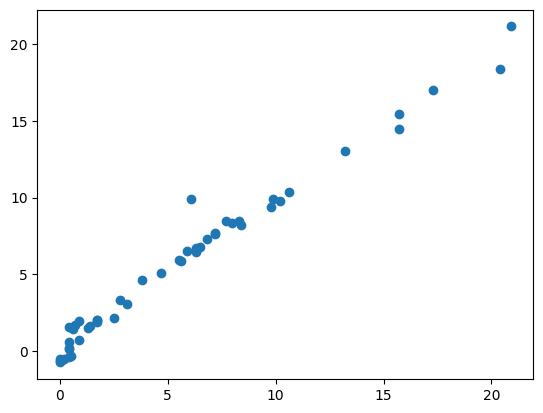

In [90]:
y_pred=model3.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2score= r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2 Score:',r2score)
plt.scatter(y_test,y_pred)

### Ridge Regrssion

MAE: 0.5192048325844753
R2 Score: 0.9801058063273601


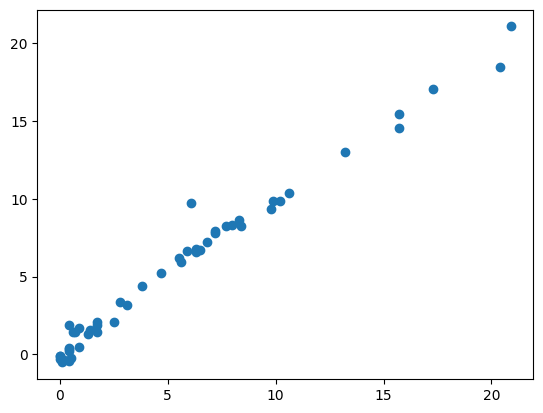

In [91]:
model1 = Ridge()
model1.fit(x_train_scaled,y_train)
y_pred=model1.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2score= r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2 Score:',r2score)
plt.scatter(y_test,y_pred)

MAE: 0.6869262008277133
R2 Score: 0.9722193780965626


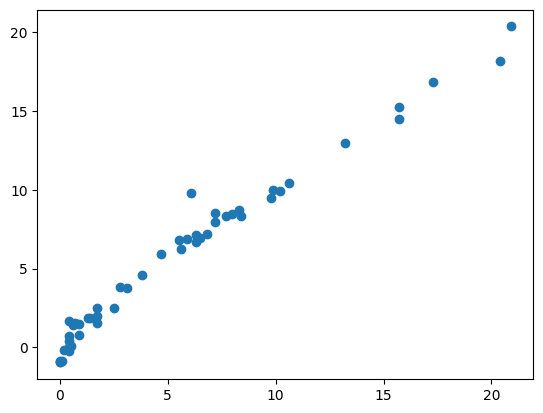

In [92]:
model4 = RidgeCV(cv=5)
model4.fit(x_train_scaled,y_train)
y_pred=model4.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2score= r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2 Score:',r2score)
plt.scatter(y_test,y_pred)

In [93]:
model4.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

### ElasticNet

MAE: 1.683441634013671
R2 Score: 0.8676961352267807


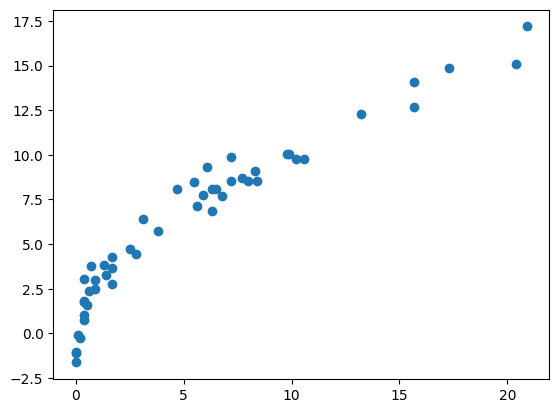

In [94]:
model6 = ElasticNet()
model6.fit(x_train_scaled,y_train)
y_pred = model6.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2score = r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2 Score:',r2score)
plt.scatter(y_test,y_pred)

MAE: 0.5710147088777219
R2 Score: 0.9781014571778188


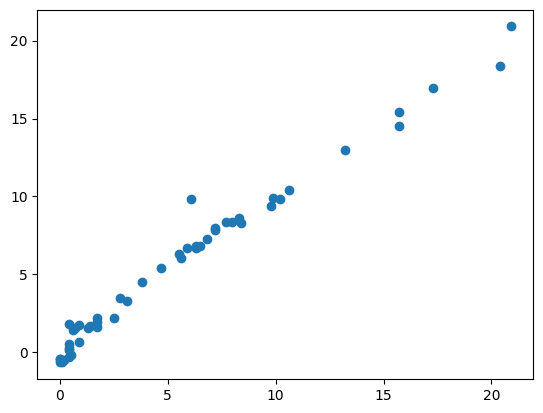

In [95]:
model6 = ElasticNetCV(cv=5)
model6.fit(x_train_scaled,y_train)
y_pred = model6.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2score = r2_score(y_test,y_pred)
print('MAE:',mae)
print('R2 Score:',r2score)
plt.scatter(y_test,y_pred)

In [96]:
model6.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [97]:
import pickle
pickle.dump(model6,open('elasticcv.pkl','wb'))

In [98]:
pickle.load(open('elasticcv.pkl','rb'))

ElasticNetCV(cv=5)

In [99]:
scaler
pickle.dump(scaler,open('scaler.pkl','wb'))